# The Torch to be Kindled

Since I'm a computer vision engineer, I would like to choose a few functions from Torchvision library as well, which is a part of Pytorch project.

- `torchvision.io.read_image` ([doc](https://pytorch.org/vision/stable/io.html#torchvision.io.read_image))
- `torchvision.io.write_jpeg` ([doc](https://pytorch.org/vision/stable/io.html#torchvision.io.write_jpeg))
- `torch.eye` ([doc](https://pytorch.org/docs/stable/generated/torch.eye.html#torch.eye))
- `torch.is_nonzero` ([doc](https://pytorch.org/docs/stable/generated/torch.is_nonzero.html#torch.is_nonzero))
- `torch.randperm` ([doc](https://pytorch.org/docs/stable/generated/torch.randperm.html#torch.randperm))

Before we begin, let's install and import PyTorch

In [1]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy torch torchvision torchaudio

In [2]:
# Import torch and other required modules
import PIL
import torch
import torchvision
import numpy as np
import torchvision.transforms as T

## Function 1 - torchvision.io.read_image

_Reads a JPEG or PNG image into a 3 dimensional RGB Tensor. Optionally converts the image to the desired format. The values of the output tensor are uint8 between 0 and 255._

In [3]:
# Let's download two sample images from the Jovian course page and save them
!wget -q --output-document=jovian1.jpeg "https://jovian.ai/_next/image?url=https%3A%2F%2Fjovian.ai%2Fapi%2Flearn%2Fcourse%2Fdeep-learning-with-pytorch-zero-to-gans%2Fimages%2F4ef6d9eb99d0404b84406c1267941660%2FData_Structures_and_Algorithms_with_Python_5.png&w=640&q=90"
!wget -q --output-document=jovian2.jpeg "https://jovian.ai/_next/image?url=https%3A%2F%2Fjovian.ai%2Fapi%2Flearn%2Fcourse%2Fdata-structures-and-algorithms-in-python%2Fimages%2F9c9e8e8578964b86b6f85125c911d98c%2FData_Structures_and_Algorithms_with_Python_3.png&w=640&q=90"
# list the current files in the working directory
!ls

01-tensor-operations.ipynb  jovian1.jpeg  jovian2.jpeg	work


In [4]:
# Example 1 - working (change this)
jovian1 = torchvision.io.read_image("jovian1.jpeg")
print("Type of the file:", type(jovian1))
print("Shape of the file:", jovian1.shape)

Type of the file: <class 'torch.Tensor'>
Shape of the file: torch.Size([4, 192, 640])


We have downloaded a sample image and the `read_image` function of Torchvision library saved it to a variable (note that it's a "channel first" implementation. Unlike Pytorch, OpenCV saves it as "channel last", i.e. `[192, 610, 4]`).<br>Now, let's see the img.

Shape of the image: (192, 640, 4)


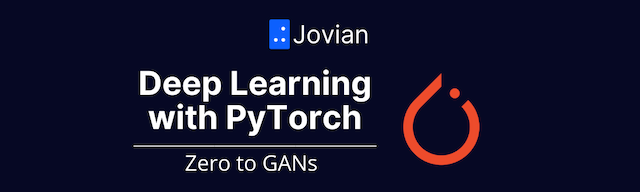

In [5]:
# convert from Tensor to Image
jovian1 = T.ToPILImage()(jovian1.to('cpu'))
print("Shape of the image:", np.asarray(jovian1).shape)
jovian1.show()

Shape of the image: (192, 640)


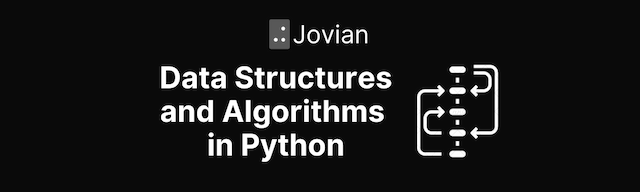

In [6]:
# Example 2 - working
jovian2 = torchvision.io.read_image(
    path="./jovian2.jpeg",
    mode=torchvision.io.ImageReadMode.GRAY)  # Saved as Gray (B/W)

jovian2 = T.ToPILImage()(jovian2.to('cpu'))
print("Shape of the image:", np.asarray(jovian2).shape)
jovian2.show()

This time we loaded the image as black & white by the help of `mode` parameter. 

In [7]:
# Example 3 - breaking (to illustrate when it breaks)
jovian3 = torchvision.io.read_image("./jovian3.jpeg")

RuntimeError: [Errno 2] No such file or directory: './jovian3.jpeg'

Since the image `jovian3.jpeg` doesn't exist, the function throws a `RuntimeError` and states the problem.

There are much more easier way to read the image file by `OpenCV` or `Pillow` but when we need the images as **tensors**, the function will be quite handy.

Let's save our work using Jovian before continuing.

In [8]:
# !pip install jovian --upgrade --quiet

In [9]:
import jovian

In [10]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

## Function 2 - torchvision.io.write_jpeg

_Takes an input tensor in CHW layout and saves it in a JPEG file._

In [11]:
# Example 1 - working
# As stated above, the below function will give us the image as tensor.
jovian1 = torchvision.io.read_image(
    path="jovian1.jpeg",
    mode=torchvision.io.ImageReadMode.RGB)
print("Type of the variable:", type(jovian1))

Type of the variable: <class 'torch.Tensor'>


We have changed our image to 3 channel (RGB) because `write_jpeg` function accepts 1 or 3 channels.

In [12]:
# Now we can save this tensor file to anywhere we want in our local.
torchvision.io.write_jpeg(input=jovian1, filename="newFile.jpeg")
!ls

01-tensor-operations.ipynb  jovian1.jpeg  jovian2.jpeg	newFile.jpeg  work


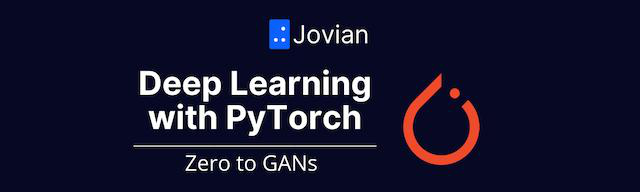

In [13]:
# ...and we show the image below
PIL.Image.open("newFile.jpeg")

We can save any tensor image to a path we define with parameters we specified (see below).

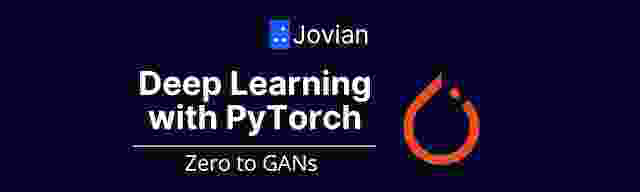

In [14]:
# Example 2 - working
# Let's change the quality
torchvision.io.write_jpeg(
    input=jovian1,
    filename="newLowQualityFile.jpeg", quality=5)  # Quality: 5%
PIL.Image.open("newLowQualityFile.jpeg")

`quality` parameter defines the jpeg quality. As can be seen, they have quite different file sizes:

In [15]:
!echo "Size of the files:" && du -sh newFile.jpeg && du -sh newLowQualityFile.jpeg

Size of the files:
16K	newFile.jpeg
8.0K	newLowQualityFile.jpeg


In [16]:
# Example 3 - breaking (to illustrate when it breaks)
# quality parameters takes a float
torchvision.io.write_jpeg(
    input=jovian1,
    filename="newLowQualityFile.jpeg", quality=25.8)  # Quality: 25.8%

RuntimeError: image::encode_jpeg() Expected a value of type 'int' for argument '_1' but instead found type 'float'.
Position: 1
Value: 25.8
Declaration: image::encode_jpeg(Tensor _0, int _1) -> (Tensor _0)
Cast error details: Unable to cast Python instance to C++ type (compile in debug mode for details)

`quality` parameter only takes integers.

Again, there could be multiple ways to save numpy arrays or PIL images to a path, but when we work with tensors, this function is the man!

In [17]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

## Function 3 - torch.eye

_Returns a 2-D tensor with ones on the diagonal and zeros elsewhere._

In [18]:
# Example 1 - working
eye1 = torch.eye(5)
eye1

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

The function gives a square matrix of which only the diagonals are 1.

In [32]:
# Example 2 - working
eye2 = torch.eye(n=5, m=3, dtype=torch.uint8)
eye2

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

As can be seen, it doesn't have to be a square matrix and the parameter `m` defines the number of diagonal elements to be set to 1. Also, data type is changed to `uint8`.

In [34]:
# Example 3 - breaking (to illustrate when it breaks)
eye2 = torch.eye(5, dtype="uint")
eye2

TypeError: eye() received an invalid combination of arguments - got (int, dtype=str), but expected one of:
 * (int n, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (int n, int m, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


The data type parameter only takes `torch.dtype` object. A simple string wouldn't do the job.

Instead of defining the diagonal elements one by one, this simple function creates an identitiy matrix right off the bat.

In [36]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

## Function 4 - torch.is_nonzero

Returns True if the input is a single element tensor which is not equal to zero after type conversions. i.e. not equal to `torch.tensor([0.])` or `torch.tensor([0])` or `torch.tensor([False])`. Throws a `RuntimeError` if `torch.numel() != 1` (even in case of sparse tensors).

In [47]:
# Example 1 - working
non1 = torch.is_nonzero(input=torch.tensor([0]))
non1

False

If the one-element tensor is zero, the output becomes False because 0 is not a nonzero element (duh!).

In [70]:
# Example 2 - working
non2 = torch.is_nonzero(input=torch.tensor(19))
non2

True

Every tensor (including this 0-D tensor) element except zero will return True.

In [50]:
# Example 3 - breaking (to illustrate when it breaks)
non2 = torch.is_nonzero(
    input=torch.tensor(
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]
    ))
non2

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

As an input, only "one-element" tensor is accepted.

Closing comments about when to use this function

In [51]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

## Function 5 - torch.randperm

Returns a random permutation of integers from 0 to n - 1.

In [59]:
# Example 1 - working
torch.randperm(n=5)

tensor([0, 2, 3, 4, 1])

Since it's a permutation set, the numbers don't repeat.

In [68]:
# Example 2 - working
torch.randperm(n=16, dtype=torch.uint8)

tensor([ 9, 11, 10,  8, 14,  1,  6, 13,  3, 12,  2,  4,  5,  7,  0, 15],
       dtype=torch.uint8)

We also can specify the data type.

In [73]:
# Example 3 - breaking (to illustrate when it breaks)
torch.randperm(n=257, dtype=torch.uint8)

RuntimeError: value cannot be converted to type uint8_t without overflow: 256

...but beware! Since there can't be any unsigned 8-bit integer higher than 255, you have to define your data type wisely. (Note that `n=257` since it's exclusive. i.e. highest number it produces would be 256, which is out of `uint8` range.)

As a random and unique number generator, the function seems quite useful.

In [74]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

## Conclusion

In this notebook, some of the Torchvision library function are demonstrated as well as some simple Torch functions.

## Reference Links
Provide links to your references and other interesting articles about tensors
* Official Torchvision library: [Documentation](https://pytorch.org/vision/stable/index.html)
* Official Pytorch library for tensor operations: [Documentation](https://pytorch.org/docs/stable/torch.html)
* Official Torchvision library for image Transformation: [Documentation for Converting Tensors to PIL Images](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToPILImage)

In [75]:
jovian.commit(project='01-tensor-operations')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gulmert89/01-tensor-operations" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gulmert89/01-tensor-operations


'https://jovian.ai/gulmert89/01-tensor-operations'

---
## Please ignore this cell. It's an explanation passage from Jovian.
---

> ### Assignment Instructions (delete this cell before submission)
> 
> The objective of this assignment is to develop a solid understanding of PyTorch tensors. In this assignment you will:
>
> 1. Pick 5 interesting functions related to PyTorch tensors by [reading the documentation](https://pytorch.org/docs/stable/torch.html), 
> 2. Edit this starter template notebook to illustrate their usage and publish your notebook to Jovian using `jovian.commit`. Make sure to add proper explanations too, not just code.
> 3. Submit the link to your published notebook on Jovian here: https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/assignment/assignment-1-all-about-torch-tensor .
> 4. (Optional) Write a blog post on [Medium](https://medium.com) to accompany and showcase your Jupyter notebook. [Embed cells from your notebook](https://medium.com/@aakashns/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e) wherever necessary.
> 5. (Optional) [Share your work](https://jovian.ai/forum/t/pytorch-functions-and-tensor-operations/13790) with the community and exchange feedback with other participants
>
>
> The recommended way to run this notebook is to click the "Run" button at the top of this page, and select "Run on Colab". Run `jovian.commit` regularly to save your progress.
> 
> Try to give your notebook an interesting title e.g. "All about PyTorch tensor operations", "5 PyTorch functions you didn't know you needed", "A beginner's guide to Autograd in PyToch", "Interesting ways to create PyTorch tensors", "Trigonometic functions in PyTorch", "How to use PyTorch tensors for Linear Algebra" etc.
>
> **IMPORTANT NOTE**: Make sure to submit a Jovian notebook link e.g. https://jovian.ai/aakashns/01-tensor-operations . Colab links will not be accepted.
>
> Remove this cell containing instructions before making a submission or sharing your notebook, to make it more presentable.
>

